<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/main/ml_assignment_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

# Generate input data
t_u = np.random.rand(100, 1) * 10.0

# Generate target variable using the given relationship: w2 * t_u^2 + w1 * t_u + b
w2, w1, b = 2.0, 1.0, 1.0
t_c = w2 * t_u**2 + w1 * t_u + b + np.random.randn(100, 1) * 1.0

# Convert arrays to PyTorch tensors
t_u_tensor = torch.from_numpy(t_u).float()
t_c_tensor = torch.from_numpy(t_c).float()

# Define the model
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x ** 2)

# Training function for the nonlinear model
def train_nonlinear_model(optimizer_name, learning_rate):
    model = NonLinearModel()
    criterion = nn.MSELoss()

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'ADAM':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(5001):
        inputs = Variable(t_u_tensor)
        targets = Variable(t_c_tensor)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 500 epochs
        if epoch % 500 == 0:
            print(f'Optimizer: {optimizer_name}, Learning Rate: {learning_rate}, Epoch [{epoch}/5000], Loss: {loss.item():.4f}')

    return loss.item(), model

# Train the nonlinear model with different learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]
optimizers = ['SGD', 'ADAM']
results_nonlinear = {}

for optimizer_name in optimizers:
    for lr in learning_rates:
        print(f'\nTraining with {optimizer_name} optimizer and learning rate {lr}')
        loss, nonlinear_model = train_nonlinear_model(optimizer_name, lr)
        results_nonlinear[(optimizer_name, lr)] = (loss, nonlinear_model)



Training with SGD optimizer and learning rate 0.1
Optimizer: SGD, Learning Rate: 0.1, Epoch [0/5000], Loss: 7007.8633
Optimizer: SGD, Learning Rate: 0.1, Epoch [500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [1000/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [1500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [2000/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [2500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [3000/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [3500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [4000/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [4500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.1, Epoch [5000/5000], Loss: nan

Training with SGD optimizer and learning rate 0.01
Optimizer: SGD, Learning Rate: 0.01, Epoch [0/5000], Loss: 12824.2217
Optimizer: SGD, Learning Rate: 0.01, Epoch [500/5000], Loss: nan
Optimizer: SGD, Learning Rate: 0.01, Epoch [1

In [2]:
# Filtering results with NaN loss values
filtered_results_nonlinear = {key: value for key, value in results_nonlinear.items() if not np.isnan(value[0])}

# Finding the best nonlinear model setup with the lowest loss after filtering NaN values
best_setup_nonlinear_filtered = min(filtered_results_nonlinear, key=lambda k: filtered_results_nonlinear[k][0])
best_loss_nonlinear_filtered, best_model_nonlinear_filtered = filtered_results_nonlinear[best_setup_nonlinear_filtered]


In [3]:
# Linear model from lecture
linear_model = nn.Linear(1, 1)
linear_criterion = nn.MSELoss()
linear_optimizer = optim.SGD(linear_model.parameters(), lr=0.01)

# Training loop for linear model
for epoch in range(5001):
    inputs = Variable(t_u_tensor)
    targets = Variable(t_c_tensor)

    # Forward pass
    outputs = linear_model(inputs)
    linear_loss = linear_criterion(outputs, targets)

    # Backward pass and optimization
    linear_optimizer.zero_grad()
    linear_loss.backward()
    linear_optimizer.step()

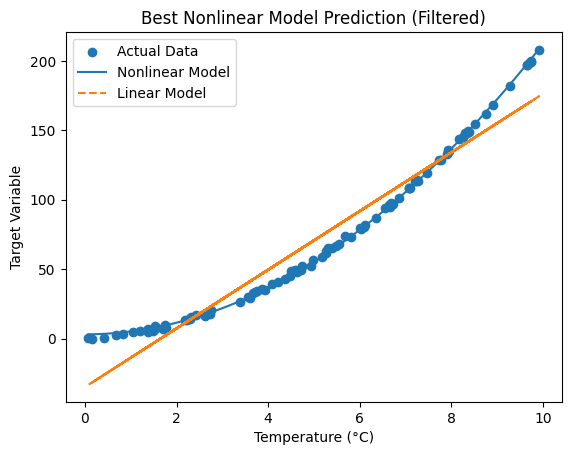

In [5]:
# Assuming 't_u_plot' should be a range of values for plotting the model's fit
t_u_plot = torch.linspace(torch.min(t_u_tensor), torch.max(t_u_tensor), 100).unsqueeze(1)

# Plotting the data and best nonlinear model (filtered)
plt.scatter(t_u_tensor.numpy(), t_c_tensor.numpy(), label='Actual Data')
plt.plot(t_u_plot.numpy(), best_model_nonlinear_filtered(t_u_plot).detach().numpy(), label='Nonlinear Model')
plt.plot(t_u_tensor.numpy(), linear_model(t_u_tensor).detach().numpy(), label='Linear Model', linestyle='dashed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Target Variable')
plt.title('Best Nonlinear Model Prediction (Filtered)')
plt.legend()
plt.show()